# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [24]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [25]:
sinasc_df2 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]

In [26]:
sinasc_df2.groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [27]:
sinasc_df2 = sinasc_raw[['ESCMAE', 'SEXO', 'PESO', 'DTNASC']].copy()
sinasc_df2[sinasc_df2['DTNASC'] == '2019-10-05'].groupby(['ESCMAE', 'SEXO'])['PESO'].mean().unstack()

SEXO,Feminino,Masculino
ESCMAE,,
1 a 3 anos,2647.500000,3240.000000
12 anos ou mais,3157.500000,3392.500000
4 a 7 anos,3417.500000,3340.000000
8 a 11 anos,3259.736842,3397.173913


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [28]:
df_mun_menos_nascimeto = sinasc_raw.groupby('munResNome')['IDADEMAE'].count().sort_values().to_frame()
df_mun_menos_nascimeto

## RESPOSTA: CASTANHEIRA

,IDADEMAE
munResNome,
Município ignorado - RO,1
Castanheiras,32
Pimenteiras do Oeste,40
Primavera de Rondônia,43
Parecis,44
Rio Crespo,50
São Felipe D'Oeste,54
Teixeirópolis,64
Cacaulândia,75


In [29]:
sinasc_castanheiras = sinasc_raw[sinasc_raw['munResNome'] == 'Castanheiras']
sinasc_castanheiras = sinasc_castanheiras[['munResNome', 'IDADEMAE', 'IDADEPAI']]
agrupados = sinasc_castanheiras.groupby('munResNome').aggregate([('MEDIA','mean'), ('MAXIMA','max'), ('MINIMA','min')])
agrupados

IDADEMAE                 IDADEPAI              
                 MEDIA MAXIMA MINIMA      MEDIA MAXIMA MINIMA
munResNome                                                   
Castanheiras  27.28125     39     17  30.392857   43.0   17.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [30]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])
sinasc_raw['MONTH'] = pd.DatetimeIndex(sinasc_raw['DTNASC']).month
sinasc_marco = sinasc_raw[sinasc_raw['MONTH'] == 3]
sinasc_marco.groupby('munResNome')['MONTH'].count().sort_values(ascending=False)

munResNome
Porto Velho                  744
Ji-Paraná                    188
Vilhena                      148
Ariquemes                    141
Cacoal                       133
Jaru                          80
Guajará-Mirim                 75
Rolim de Moura                69
Ouro Preto do Oeste           67
Pimenta Bueno                 62
Buritis                       59
Nova Mamoré                   53
Espigão D'Oeste               44
Machadinho D'Oeste            44
São Miguel do Guaporé         41
Candeias do Jamari            33
São Francisco do Guaporé      31
Alta Floresta D'Oeste         31
Presidente Médici             29
Costa Marques                 24
Alvorada D'Oeste              22
Alto Paraíso                  22
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Colorado do Oeste             19
Seringueiras                  19
Chupinguaia                   18
Cujubim                       17
Cerejeiras                    16
Urupá                         14

In [31]:
sinasc_porto_velho_marco = sinasc_marco[sinasc_marco['munResNome'] == 'Porto Velho']
sinasc_porto_velho_marco = sinasc_porto_velho_marco[['munResNome', 'QTDFILVIVO', 'IDADEMAE', 'IDADEPAI']]
agrupados = sinasc_porto_velho_marco.groupby('munResNome').agg([('MEDIA','mean'), ('MAXIMA','max'), ('MINIMA','min')])
agrupados

QTDFILVIVO                 IDADEMAE                 IDADEPAI  \
                 MEDIA MAXIMA MINIMA      MEDIA MAXIMA MINIMA      MEDIA   
munResNome                                                                 
Porto Velho   1.295056    9.0    0.0  26.596774     44     14  34.629032   

                           
            MAXIMA MINIMA  
munResNome                 
Porto Velho   62.0   19.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

<Axes: xlabel='ESCMAE'>

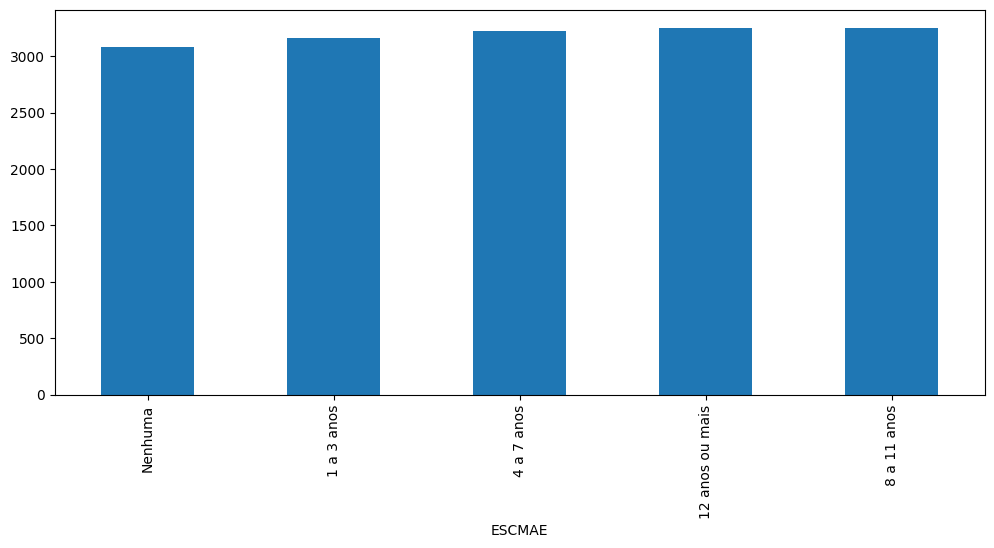

In [94]:
sinasc_raw = sinasc_raw[['ESCMAE', 'SEXO', 'PESO']]
sinasc_raw.groupby(['ESCMAE'])['PESO'].mean().sort_values().plot.bar(figsize=(12,5))

## QUANTO MAIOR O TEMPO DE ESTUDO DA MÃE, MAIOR O PESO DA CRIANÇA, POIS PROVAVELMENTE A MÃE TEM MAIS ESTRUTURA PARA CUIDAR DE SUA SAUDE E DAR UMA GESTAÇÃO SALDÁVEL PARA SEU BEBÊ.

In [83]:
# sinasc_raw.dtypes

In [34]:
# sinasc_raw.select_dtypes(exclude=['int64','float64'])

In [36]:
# sinasc_raw.columns